# Reading the Data and Overview about it

In [144]:
import numpy as np
import pandas as pd
import chardet
import csv

In [145]:
db_milesDriven =pd.read_csv(r"C:\Users\dell\Desktop\Internship_technocolabs\miles-driven.csv", sep='|')
db_milesDriven.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [146]:
db_road_accidents=pd.read_csv(r"C:\Users\dell\Desktop\Internship_technocolabs\road-accidents.csv", sep = '|', comment="#")
#db_road_accidents=pd.read_csv(r"C:\Users\dell\Desktop\Internship_technocolabs\road-accidents.csv", sep = '|', skiprows = 9)
db_road_accidents.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


# Create a textual and a graphical summary of the data

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## textual summary of data

In [148]:
db_road_accidents.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


In [149]:
db_milesDriven.describe()

,million_miles_annually
count,51.000000
mean,57851.019608
std,59898.414088
min,3568.000000
25%,17450.000000
50%,46606.000000
75%,71922.500000
max,320784.000000


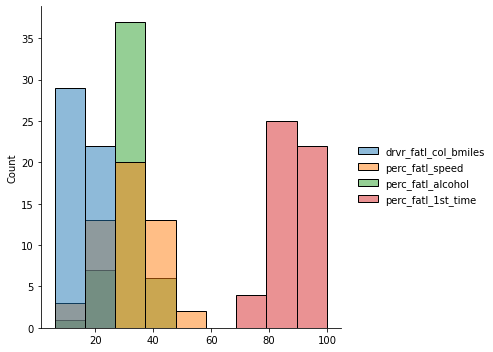

In [150]:
sns.displot(data= db_road_accidents)

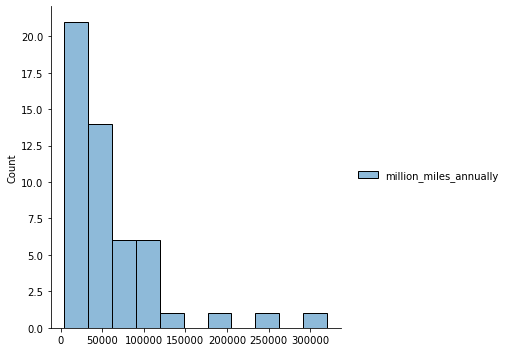

In [151]:
sns.displot(data= db_milesDriven  )

In [152]:
#sns.scatterplot(data= db_milesDriven  )

<AxesSubplot:xlabel='perc_fatl_1st_time', ylabel='drvr_fatl_col_bmiles'>

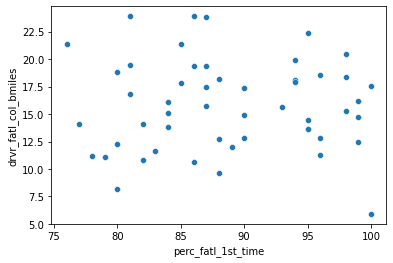

In [156]:
sns.scatterplot(x=db_road_accidents['perc_fatl_1st_time']  ,y =db_road_accidents['drvr_fatl_col_bmiles'])

<AxesSubplot:xlabel='perc_fatl_speed', ylabel='Count'>

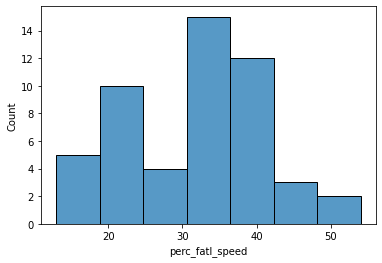

In [157]:
sns.histplot(data=db_road_accidents ,x=db_road_accidents['perc_fatl_speed'] )

<AxesSubplot:xlabel='perc_fatl_alcohol', ylabel='Count'>

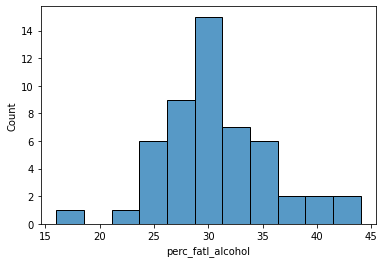

In [158]:
sns.histplot(data=db_road_accidents ,x=db_road_accidents['perc_fatl_alcohol'] )

<AxesSubplot:xlabel='perc_fatl_1st_time', ylabel='Count'>

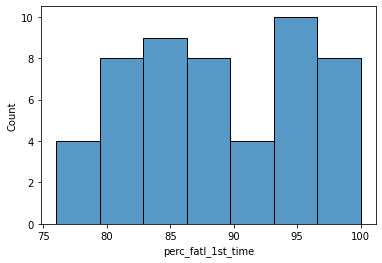

In [159]:
sns.histplot(data=db_road_accidents ,x=db_road_accidents['perc_fatl_1st_time'] )

In [160]:
# sns.histplot(data=db_road_accidents ,x=db_road_accidents['drvr_fatl_col_bmiles'] )

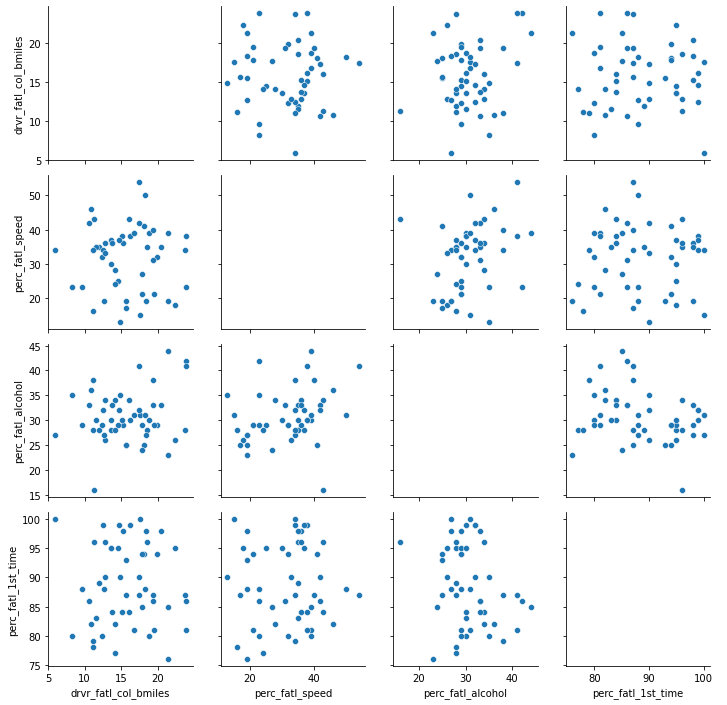

In [161]:
g = sns.PairGrid(db_road_accidents)
g.map_offdiag(sns.scatterplot)
g.add_legend()

D:\New folder (2)\lib\site-packages\seaborn\axisgrid.py:156: UserWarning:

The handle <matplotlib.patches.Patch object at 0x000001DD8E6711C0> has a label of '_nolegend_' which cannot be automatically added to the legend.



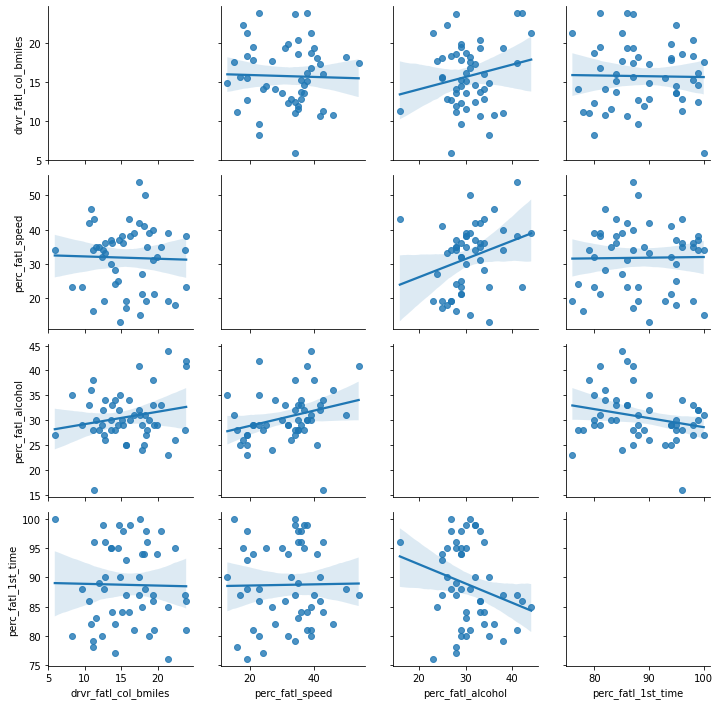

In [162]:
g = sns.PairGrid(db_road_accidents)
g.map_offdiag(sns.regplot)
g.add_legend()

# quantify the association

In [163]:
from numpy.random import seed
from scipy.stats import pearsonr
import numpy as np

seed(1)

In [164]:
corr_1 = np.corrcoef(db_road_accidents['perc_fatl_1st_time'], db_road_accidents['drvr_fatl_col_bmiles'])
corr_1

array([[ 1.        , -0.01794188],
       [-0.01794188,  1.        ]])

In [165]:
corr_2 =  np.corrcoef(db_road_accidents['perc_fatl_speed'], db_road_accidents['drvr_fatl_col_bmiles'])
corr_2

array([[ 1.        , -0.02908015],
       [-0.02908015,  1.        ]])

In [166]:
corr_3 =  np.corrcoef(db_road_accidents['perc_fatl_alcohol'], db_road_accidents['drvr_fatl_col_bmiles'])
corr_3

array([[1.        , 0.19942634],
       [0.19942634, 1.        ]])

In [167]:
corr_4 =  np.corrcoef(db_road_accidents['perc_fatl_1st_time'], db_road_accidents['perc_fatl_alcohol'])
corr_4

array([[ 1.        , -0.24545506],
       [-0.24545506,  1.        ]])

In [168]:
corr_5 =  np.corrcoef(db_road_accidents['perc_fatl_alcohol'], db_road_accidents['drvr_fatl_col_bmiles'])
corr_5

array([[1.        , 0.19942634],
       [0.19942634, 1.        ]])

In [169]:
corr_6 =  np.corrcoef(db_road_accidents['perc_fatl_1st_time'], db_road_accidents['drvr_fatl_col_bmiles'])
corr_6

array([[ 1.        , -0.01794188],
       [-0.01794188,  1.        ]])

# fitting a mulitvarite linear regression


In [170]:
from sklearn import linear_model

In [171]:
x = db_road_accidents.drop(['drvr_fatl_col_bmiles'] ,axis=1)
y = db_road_accidents['drvr_fatl_col_bmiles']

In [172]:
states=pd.get_dummies(x['state'],drop_first=True)
x= x.drop(labels=['state'],axis=1)
x=pd.concat([x,states],axis=1)
reg = linear_model.LinearRegression()
reg.fit(db_road_accidents[['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time']],db_road_accidents.drvr_fatl_col_bmiles)

reg.coef_

array([-0.04180041,  0.19086404,  0.02473301])


# there is a masking relationship between alcohol and bmiles

In [173]:
#x = db_road_accidents.drop(['drvr_fatl_col_bmiles'] ,axis=1)
#y = db_road_accidents['drvr_fatl_col_bmiles']
#x.head()

In [174]:
#states=pd.get_dummies(x['state'],drop_first=True)
#x= x.drop(labels=['state'],axis=1)
#x=pd.concat([x,states],axis=1)


In [175]:
#x.head()

In [176]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

In [177]:
#from sklearn.linear_model import LinearRegression
#mL= LinearRegression()
#mL.fit(X_train,y_train)


In [178]:
#y_pred = mL.predict(X_test)

In [179]:
#from sklearn.metrics import r2_score
#score=r2_score(y_test,y_pred)
#print(score)

# pca on standraized data

In [200]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from matplotlib import pyplot
#x = db_road_accidents.drop(['drvr_fatl_col_bmiles'] ,axis=1)
#y = db_road_accidents['drvr_fatl_col_bmiles']
#states=pd.get_dummies(x['state'],drop_first=True)
#x= x.drop(labels=['state'],axis=1)
#x=pd.concat([x,states],axis=1)
#trans = MinMaxScaler()
#data = trans.fit_transform(x)
# convert the array back to a dataframe
#dataset = DataFrame(data)
# summarize
#print(dataset.describe())
# histograms of the variables
#dataset.hist()
#pyplot.show()
#dataset.head()
features = db_road_accidents[['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']]
target = db_road_accidents['drvr_fatl_col_bmiles']


The cumulative variance of the first two principal components is 0.7947


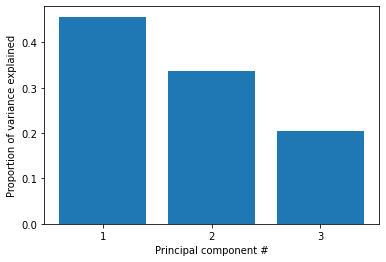

In [201]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Import the PCA class function from sklearn
from sklearn.decomposition import PCA
pca = PCA()

# Fit the standardized data to the pca
pca.fit(features_scaled)

# Plot the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = sum(pca.explained_variance_ratio_[:2])
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

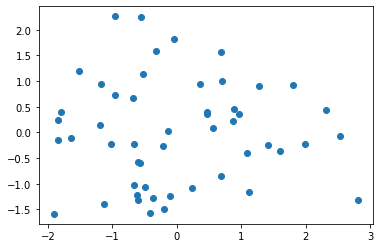

In [202]:
pca = PCA(n_components=2)
p_comps = pca.fit_transform(features_scaled)

# Extract the first and second component to use for the scatter plot
p_comp1 = p_comps[:,0]
p_comp2 = p_comps[:,1]

# Plot the first two principal components in a scatter plot
plt.scatter(p_comp1, p_comp2)

In [181]:
# importing required libraries
#import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd
#from sklearn import preprocessing
#from sklearn import utils
#import plotly.express as px


In [182]:


# distributing the dataset into two components X and Y
#X = dataset.iloc[:, 0:52].values

#y = dataset.iloc[:,0].values
#lab = preprocessing.LabelEncoder()
#y_transformed = lab.fit_transform(y)

In [183]:
#from sklearn.decomposition import PCA
 
#pca = PCA(n_components = 2)
#X = dataset.iloc[:,0:2]
#components  = pca.fit_transform(X)
#total_var = pca.explained_variance_ratio_.sum() * 100
#X_test = pca.transform(X_test)
#pca_data = pd.DataFrame(components) 
#explained_variance = pca.explained_variance_ratio_

In [203]:
#fig = px.scatter_3d(
#    components, x=0, y=1,z=0,
#    title=f'Total Explained Variance: {total_var:.2f}%',
#    labels={'0': 'PC 1', '1': 'PC 2'}
#)
#fig.show()

# Kmeans 

In [185]:
import matplotlib.pyplot as plt
import numpy as np

D:\New folder (2)\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



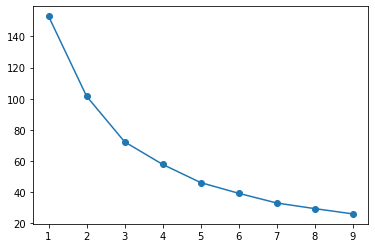

In [205]:
from sklearn.cluster import KMeans

# A loop will be used to plot the explanatory power for up to 10 KMeans clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Initialize the KMeans object using the current number of clusters (k)
    km = KMeans(n_clusters=k, random_state=8)
    # Fit the scaled features to the KMeans object
    km.fit(features_scaled)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    
# Plot the results in a line plot
plt.plot(ks, inertias, marker='o')

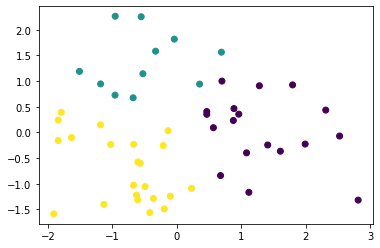

In [206]:
km = KMeans(n_clusters=3, random_state=8)

# Fit the data to the `km` object
km.fit(features_scaled)

# Create a scatter plot of the first two principal components
# and color it according to the KMeans cluster assignment 
plt.scatter(p_comps[:,0], p_comps[:,1], c=km.labels_)

In [204]:
#PC_values = np.arange(pca.n_components_) + 1
#plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
#plt.title('Scree Plot')
#plt.xlabel('Principal Component')
#plt.ylabel('Variance Explained')
#plt.show()

# kmeans 

In [210]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA 
#from sklearn.datasets import make_blobs
#from sklearn.cluster import KMeans

In [211]:
#kmeans =KMeans(n_clusters=3).fit(X)
#kmeans.cluster_centers_

In [212]:
#kmeans.labels_

In [213]:
#pca_data.head()

In [214]:
#pca_data['cluster'] = pd.Categorical(kmeans.labels_)
#sns.scatterplot(x=0,y=1,hue="cluster",data=pca_data)

In [215]:
#X.head()

In [216]:
#dataset.head()

In [217]:
#x.head()

In [218]:
#miles_driven = db_milesDriven['million_miles_annually']
#x = pd.concat([x,miles_driven],axis=1)
#x.head()

# Visualize the feature differences between the clusters


In [223]:
# Create a new column with the labels from the KMeans clustering
db_road_accidents['cluster'] = km.labels_

# Reshape the DataFrame to the long format
melt_car = pd.melt(db_road_accidents, id_vars=['cluster'], 
                   value_vars=['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time'],
                   var_name='measurement', value_name='percent')

melt_car.head()

# Create a violin plot splitting and coloring the results according to the km-clusters


,cluster,measurement,percent
0,0,perc_fatl_speed,39
1,2,perc_fatl_speed,41
2,2,perc_fatl_speed,35
3,2,perc_fatl_speed,18
4,2,perc_fatl_speed,35


<AxesSubplot:xlabel='percent', ylabel='measurement'>

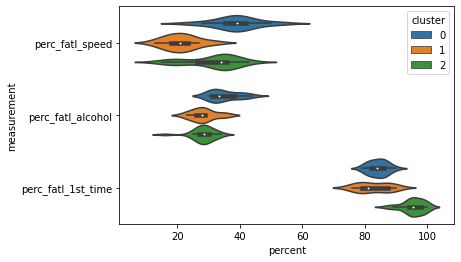

In [224]:
sns.violinplot(x='percent', y='measurement', data=melt_car, hue='cluster' )

# Compute the number of accidents within each cluster

C:\Users\dell\AppData\Local\Temp\ipykernel_19440\1419825238.py:14: FutureWarning:

['state'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



,count,mean,sum
cluster,,,
0,18,911.406439,16405.3159
1,11,860.505945,9465.5654
2,22,898.378595,19764.3291


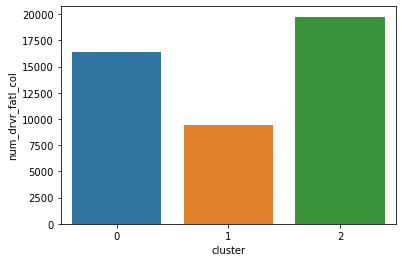

In [228]:
# Read in the new dataset
db_milesDriven =pd.read_csv(r"C:\Users\dell\Desktop\Internship_technocolabs\miles-driven.csv", sep='|')

# Merge the `car_acc` DataFrame with the `miles_driven` DataFrame
db_road_accidents_miles = db_road_accidents.merge(db_milesDriven)

# Create a new column for the number of drivers involved in fatal accidents
db_road_accidents_miles['num_drvr_fatl_col'] = db_road_accidents_miles['million_miles_annually'] * db_road_accidents_miles['drvr_fatl_col_bmiles'] / 1000

# # Create a barplot of the total number of accidents per cluster
sns.barplot(x='cluster', y='num_drvr_fatl_col', data=db_road_accidents_miles, estimator=sum, ci=None)

# # Calculate the number of states in each cluster and their 'num_drvr_fatl_col' mean and sum.
count_mean_sum = db_road_accidents_miles.groupby('cluster').agg(['count', 'mean', 'sum'])['num_drvr_fatl_col']
count_mean_sum

# Make a decision when there is no clear right choice

In [229]:
cluster_num = 2